In [15]:
import pandas as pd
import numpy as np

from plotly.express import scatter_3d
from seaborn import histplot, boxplot
from matplotlib.pyplot import show

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
path = 'diabetes.csv'
df = pd.read_csv(path, usecols=['Outcome', 'Glucose', 'BMI', 'Age'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  768 non-null    int64  
 1   BMI      768 non-null    float64
 2   Age      768 non-null    int64  
 3   Outcome  768 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 24.1 KB


In [4]:
# Imputación de los valores 0 
for feature in df.columns:
  if feature == 'Outcome':
    continue
  df[feature] = df[feature].replace({0: df[feature].mean() if feature == 'BMI' else df[feature].median()})

# EDA

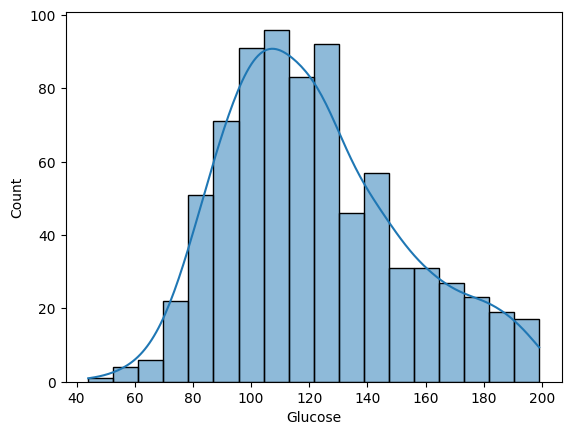

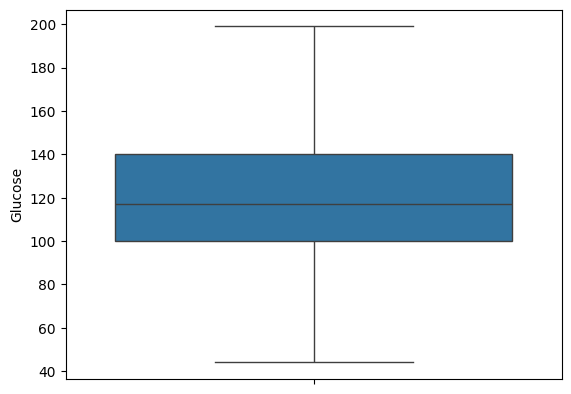

In [5]:
histplot(df['Glucose'], kde=True)
show()
boxplot(df['Glucose'])
show()

Para la 'Glucosa' se observa una distribución de los datos algo sesgada hacia la izquierda.

Con respecto a los *outliers*, no se observa la presencia de ninguno acorde con el diagrama de caja y bigote representado arriba. 

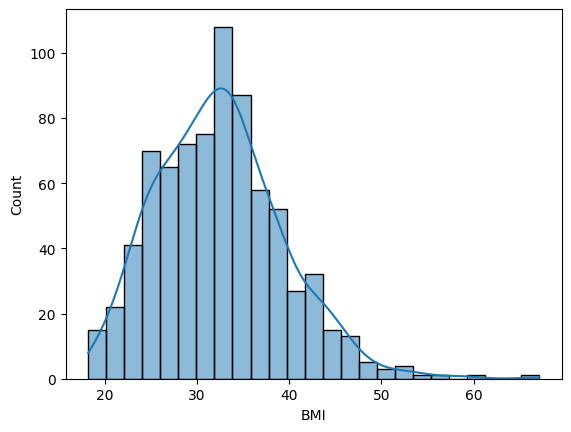

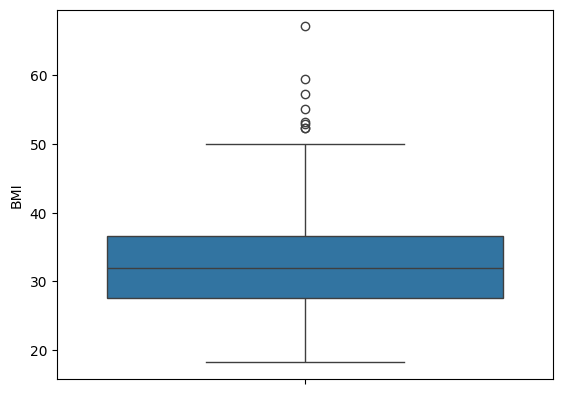

In [6]:
histplot(df['BMI'], kde=True)
show()
boxplot(df['BMI'])
show()

Para el caso del 'BMI' se observa claramente que los datos están sesgados hacia la izquierda. 

El sesgo se puede explicar fácilmente por la presencia de *outliers* hacia el **límite superior** de los datos, cosa que se observa tanto en el diagrama de caja y bigote como el histograma de la parte superior. 

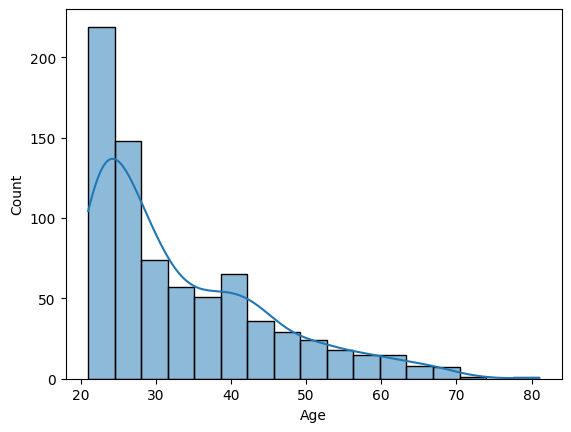

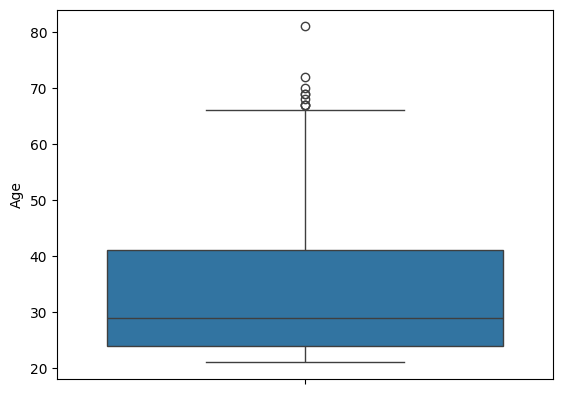

In [7]:
histplot(df['Age'], kde=True)
show()
boxplot(df['Age'])
show()

Para el último caso, de la característica 'Age' el sesgo de los datos hacia la izquierda está muy marcado por la **presencia de varios outliers** en el **límite superior**. 

Particularmente, tanto en el histograma como en el diagrama de caja y bigote se observa 1 valor atípico más marcado que el resto. 

Para finalizar con el EDA, voy a tomar una pequeña muestra de los datos para pintar un diagrama de dispersión tridimensional acorde con las características con las que vamos a entrenar el modelo de clasificación utilizando un algoritmo CART. 

In [8]:
df_sample = df.iloc[:50]
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  50 non-null     int64  
 1   BMI      50 non-null     float64
 2   Age      50 non-null     int64  
 3   Outcome  50 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.7 KB


In [9]:
scatter_3d(data_frame=df_sample, 
           x='Glucose', 
           y='Age', 
           z='BMI', 
           color=['enfermo' if ill else 'sano' for ill in df_sample['Outcome']],
           color_discrete_sequence=['#ff0000' if ill else '#00ff00' for ill in df_sample['Outcome']])

Ahora que ya está finalizado el análisis exploratorio de los datos, vamos a entrenar e investigar los algoritmos CART que ofrece la librería sklearn.

In [12]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [16]:
clsf = DecisionTreeClassifier()
clsf.fit(X, y)

DecisionTreeClassifier()

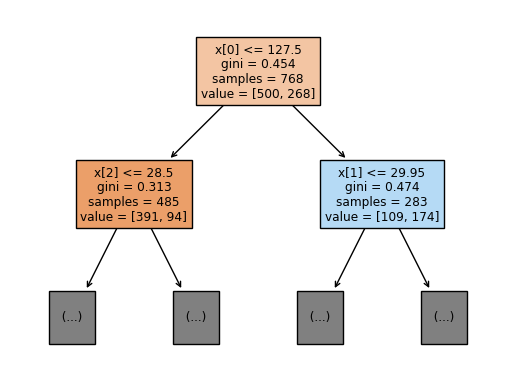

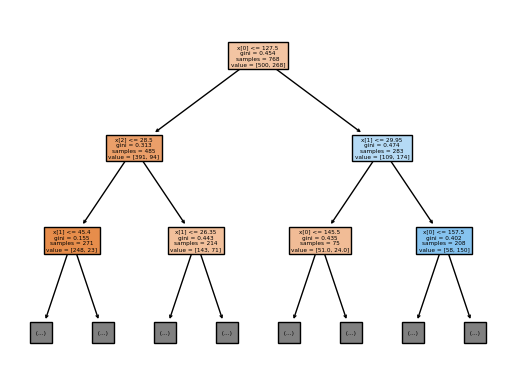

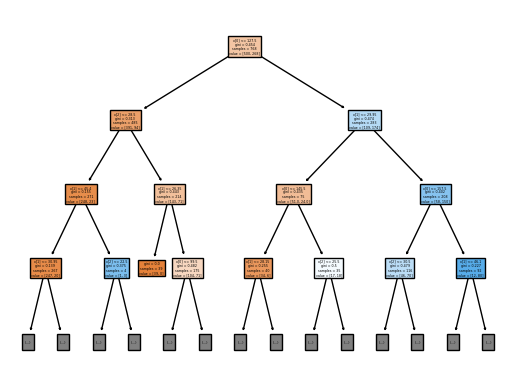

In [21]:
for i in range(1, 4):
    plot_tree(clsf, max_depth=i, filled=True)
    show()